In [1]:
import pandas as pd
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
stk_data = yf.Ticker("SPY")
print(stk_data.ticker)
df_data = stk_data.history(period='10y')

SPY


In [7]:
df_data['Week'] = df_data.index.isocalendar().week
df_data['Day'] = df_data.index.isocalendar().day

df_data['PrevDayChng'] = df_data['Close'].pct_change().shift(1).fillna(0)

df_data['EMA12'] = df_data.Close.ewm(span=12, adjust=False).mean()
df_data['EMA26'] = df_data.Close.ewm(span=26, adjust=False).mean()
df_data['MACD'] = df_data.EMA12-df_data.EMA26
df_data['Signal'] = df_data.MACD.ewm(span=9, adjust=False).mean()

df_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,EMA12,EMA26,MACD,Signal
Date,,,,,,,,,,,,,,
2011-08-17,98.817378,99.598053,97.560076,98.340752,238201100,0.0,0,33,3,0.000000,98.340752,98.340752,0.000000,0.000000
2011-08-18,95.735754,98.373622,93.180061,94.100441,512956300,0.0,0,33,4,0.000000,97.688396,98.026655,-0.338258,-0.067652
2011-08-19,92.826686,95.226241,92.448674,92.563721,428281300,0.0,0,33,5,-0.043119,96.899985,97.621993,-0.722008,-0.198523
2011-08-22,94.642816,94.692126,92.374746,92.637711,275090600,0.0,0,34,1,-0.016331,96.244250,97.252787,-1.008537,-0.360526
2011-08-23,92.982843,95.793282,92.514437,95.686455,331136600,0.0,0,34,2,0.000799,96.158435,97.136762,-0.978327,-0.484086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10,442.609985,443.440002,441.880005,442.679993,43339300,0.0,0,32,2,-0.000814,440.033348,436.564032,3.469316,3.484160
2021-08-11,443.820007,443.880005,442.619995,443.779999,44034300,0.0,0,32,3,0.001244,440.609756,437.098548,3.511208,3.489570
2021-08-12,443.619995,445.260010,442.660004,445.109985,38909400,0.0,0,32,4,0.002485,441.302099,437.691988,3.610111,3.513678


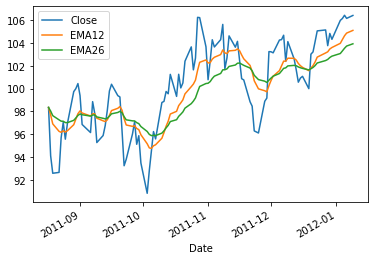

In [12]:
prices = df_data.Close[:100]
prices.plot()
df_data.EMA12[:100].plot()
df_data.EMA26[:100].plot()
plt.legend()

In [17]:
price_scaler = MinMaxScaler()
df_data_scaled = df_data
df_data_scaled[['Close']] = price_scaler.fit_transform(df_data_scaled[['Close']])

indicator_cols =['Week', 'Day', 'PrevDayChng', 'EMA12', 'EMA26', 'MACD', 'Signal']
indicator_scaler = MinMaxScaler()
df_data_scaled[indicator_cols] = indicator_scaler.fit_transform(df_data_scaled[indicator_cols])
df_data_scaled

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,EMA12,EMA26,MACD,Signal
Date,,,,,,,,,,,,,,
2011-08-16,98.176416,99.178972,97.223165,0.021038,294095200,0.0,0,0.615385,0.25,0.547045,0.010490,0.009750,0.717638,0.716671
2011-08-17,98.817378,99.598053,97.560076,0.021223,238201100,0.0,0,0.615385,0.50,0.547045,0.010592,0.009850,0.717684,0.716701
2011-08-18,95.735754,98.373622,93.180061,0.009282,512956300,0.0,0,0.615385,0.75,0.550389,0.005864,0.005450,0.713594,0.714712
2011-08-19,92.826686,95.226241,92.448674,0.004955,428281300,0.0,0,0.615385,1.00,0.331482,0.002137,0.002008,0.710103,0.712329
2011-08-22,94.642816,94.692126,92.374746,0.005163,275090600,0.0,0,0.634615,0.00,0.465403,0.000000,0.000000,0.708456,0.710362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10,442.609985,443.440002,441.880005,0.990876,43339300,0.0,0,0.596154,0.25,0.542978,0.993780,0.993890,0.825867,0.846368
2021-08-11,443.820007,443.880005,442.619995,0.993974,44034300,0.0,0,0.596154,0.50,0.553264,0.995438,0.995445,0.827174,0.846570
2021-08-12,443.619995,445.260010,442.660004,0.997719,38909400,0.0,0,0.596154,0.75,0.559468,0.997430,0.997171,0.830260,0.847467


In [17]:
price_scaler = MinMaxScaler()
df_data_scaled = df_data
df_data_scaled[['Close']] = price_scaler.fit_transform(df_data_scaled[['Close']])

indicator_cols =['Week', 'Day', 'PrevDayChng', 'EMA12', 'EMA26', 'MACD', 'Signal']
indicator_scaler = MinMaxScaler()
df_data_scaled[indicator_cols] = indicator_scaler.fit_transform(df_data_scaled[indicator_cols])
df_data_scaled

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,EMA12,EMA26,MACD,Signal
Date,,,,,,,,,,,,,,
2011-08-16,98.176416,99.178972,97.223165,0.021038,294095200,0.0,0,0.615385,0.25,0.547045,0.010490,0.009750,0.717638,0.716671
2011-08-17,98.817378,99.598053,97.560076,0.021223,238201100,0.0,0,0.615385,0.50,0.547045,0.010592,0.009850,0.717684,0.716701
2011-08-18,95.735754,98.373622,93.180061,0.009282,512956300,0.0,0,0.615385,0.75,0.550389,0.005864,0.005450,0.713594,0.714712
2011-08-19,92.826686,95.226241,92.448674,0.004955,428281300,0.0,0,0.615385,1.00,0.331482,0.002137,0.002008,0.710103,0.712329
2011-08-22,94.642816,94.692126,92.374746,0.005163,275090600,0.0,0,0.634615,0.00,0.465403,0.000000,0.000000,0.708456,0.710362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10,442.609985,443.440002,441.880005,0.990876,43339300,0.0,0,0.596154,0.25,0.542978,0.993780,0.993890,0.825867,0.846368
2021-08-11,443.820007,443.880005,442.619995,0.993974,44034300,0.0,0,0.596154,0.50,0.553264,0.995438,0.995445,0.827174,0.846570
2021-08-12,443.619995,445.260010,442.660004,0.997719,38909400,0.0,0,0.596154,0.75,0.559468,0.997430,0.997171,0.830260,0.847467


In [25]:
#Use previous 60-days to predict next 10-days
scaled_prices = df_data_scaled.Close
prices_len = len(scaled_prices)

prev_100_lst = []
date_indicators = [] #Week of year, Day of week, Prev Day % Change
MACD_indicators = [] #EMA12, EMA26, MACD, Signal
next_1_lst = []

for i in range(prices_len - 100):
    prev_100_day = scaled_prices[i:i+100]
    prev_100_lst.append(prev_100_day)

    next_1_day = scaled_prices[i+100]
    next_1_lst.append(next_1_day)

    date_indicators.append([df_data_scaled.Week[i+100], df_data_scaled.Day[i+100], df_data_scaled.PrevDayChng[i+100]])
    MACD_indicators.append([df_data_scaled.EMA12[i+100], df_data_scaled.EMA26[i+100], df_data_scaled.MACD[i+100], df_data_scaled.Signal[i+100]])

# X = np.hstack([np.array(prev_100_lst), np.array(date_indicators), np.array(MACD_indicators)])
X = np.array(prev_100_lst)
y = np.array(next_1_lst)
print(X.shape, y.shape)


#Tran/Test Split
X_train = X[:-60]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X[len(X)-60:]
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

y_train = y[:-60]
y_train = y_train.reshape(-1,1)
y_test = y[len(y)-60:]
y_test = y_test.reshape(-1,1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2417, 100) (2417,)
(2357, 100, 1) (60, 100, 1)
(2357, 1) (60, 1)


## Model

In [35]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

def LSTM_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(X.shape[1],1), return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = LSTM_model()

In [41]:
from keras.callbacks import EarlyStopping
np.random.seed(1)

callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True, verbose=1)

# model.fit(X_train, y_train, epochs=50, callbacks=[callback])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
74/74 [==============================] - 8s 107ms/step - loss: 4.0914e-04
Epoch 2/20
74/74 [==============================] - 8s 114ms/step - loss: 4.2159e-04
Epoch 3/20
74/74 [==============================] - 9s 121ms/step - loss: 4.1289e-04
Epoch 4/20
74/74 [==============================] - 9s 125ms/step - loss: 4.2135e-04
Epoch 5/20
74/74 [==============================] - 10s 133ms/step - loss: 3.8353e-04
Epoch 6/20
74/74 [==============================] - 9s 128ms/step - loss: 3.8039e-04
Epoch 7/20
74/74 [==============================] - 9s 127ms/step - loss: 3.1158e-04
Epoch 8/20
74/74 [==============================] - 11s 146ms/step - loss: 3.0080e-04
Epoch 9/20
74/74 [==============================] - 9s 123ms/step - loss: 2.8904e-04
Epoch 10/20
74/74 [==============================] - 9s 121ms/step - loss: 2.6123e-04
Epoch 11/20
74/74 [==============================] - 9s 126ms/step - loss: 2.6767e-04
Epoch 12/20
74/74 [==============================] - 10s 130m

In [42]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 43ms/step - loss: 1.0387e-04


0.00010387172369519249

In [43]:
y_pred_train = model.predict(X_train)
sns.lineplot(x=np.arange(0,len(X_train)), y= y_train[:,0])
sns.lineplot(x=np.arange(0,len(y_train)), y= y_pred_train[:,0])

<AxesSubplot:>

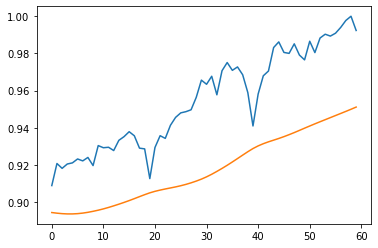

In [ ]:
y_pred_test = model.predict(X_test)
sns.lineplot(x=np.arange(0,len(X_test)), y= y_test[:,0])
sns.lineplot(x=np.arange(0,len(y_test)), y= y_pred_test[:,0])

In [40]:
price_scaler.inverse_transform(y_pred_test)

array([[408.43835],
       [408.3187 ],
       [408.22705],
       [408.17654],
       [408.17596],
       [408.22736],
       [408.3316 ],
       [408.4817 ],
       [408.67236],
       [408.88715],
       [409.13455],
       [409.4127 ],
       [409.71625],
       [410.03455],
       [410.36902],
       [410.72098],
       [411.09232],
       [411.47574],
       [411.85013],
       [412.2011 ],
       [412.48868],
       [412.72638],
       [412.93784],
       [413.13376],
       [413.33408],
       [413.5573 ],
       [413.81512],
       [414.1109 ],
       [414.44318],
       [414.81912],
       [415.2548 ],
       [415.74655],
       [416.29248],
       [416.86383],
       [417.46317],
       [418.0948 ],
       [418.74506],
       [419.40384],
       [420.0522 ],
       [420.65704],
       [421.16455],
       [421.58255],
       [421.94006],
       [422.26056],
       [422.5828 ],
       [422.93265],
       [423.3087 ],
       [423.70462],
       [424.12277],
       [424.5479 ],
